<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/tensorflow_basic/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
!wget 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'


--2025-01-19 18:06:31--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-01-19 18:06:31 (28.8 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [27]:
data = pd.read_csv('moore.csv',header=None).to_numpy()

In [28]:
X = data[:,0].reshape(-1,1)
y = data[:,1]

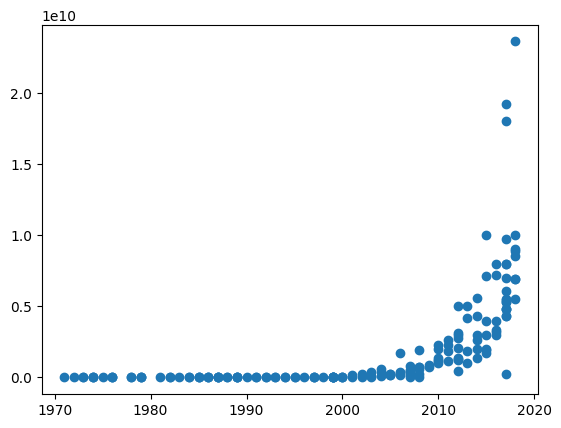

In [29]:
plt.scatter(X,y)

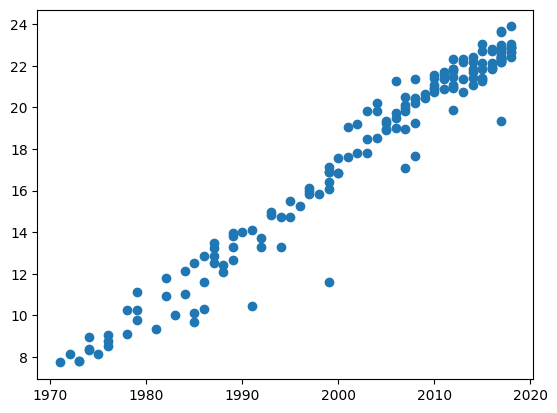

In [30]:
y = np.log(y)
plt.scatter(X,y)

In [31]:
X = X - X.mean()

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse'
    )

In [34]:
def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  else:
    return lr
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [36]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 389.1696 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 327.1646 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288.4975 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255.4819 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.3581 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 168.4501 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113.6392 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.5294 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.2784 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.4406 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.1461 - learning_rate: 0.0010
Epoch 12/200

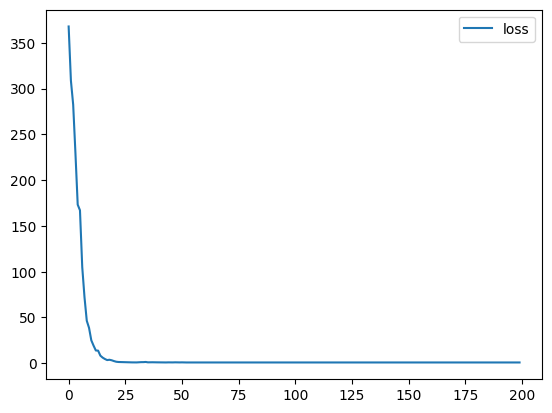

In [37]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [39]:
model.layers[0].get_weights()

[array([[0.33991536]], dtype=float32), array([17.755331], dtype=float32)]

In [40]:
a = model.layers[0].get_weights()[0][0,0]

In [41]:
a

0.33991536

In [42]:
np.log(2) / a

2.0391757830638406

In [44]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator

print(a , b)

0.341682487387313 17.764939393631764
